# Import Libraries

In [257]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt 
import seaborn as sns 

# Acquiring and visualisation of Dataset

In [258]:
data = 'Dataset/car_evaluation.csv'
df = pd.read_csv(data, header=None)

In [259]:
df.shape

(1728, 7)

In [260]:
df.head()

,0,1,2,3,4,5,6
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc


In [261]:
col_names = ['buying', 'maintanance', 'doors', 'persons', 'luggBoot', 'safety', 'ev_class']
df.columns = col_names
col_names

['buying', 'maintanance', 'doors', 'persons', 'luggBoot', 'safety', 'ev_class']

In [262]:
df.head()

,buying,maintanance,doors,persons,luggBoot,safety,ev_class
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc


In [263]:
for col in col_names:
    print(df[col].value_counts()) 

vhigh    432
high     432
med      432
low      432
Name: buying, dtype: int64
vhigh    432
high     432
med      432
low      432
Name: maintanance, dtype: int64
2        432
3        432
4        432
5more    432
Name: doors, dtype: int64
2       576
4       576
more    576
Name: persons, dtype: int64
small    576
med      576
big      576
Name: luggBoot, dtype: int64
low     576
med     576
high    576
Name: safety, dtype: int64
unacc    1210
acc       384
good       69
vgood      65
Name: ev_class, dtype: int64


In [264]:
df.isnull().sum()

buying         0
maintanance    0
doors          0
persons        0
luggBoot       0
safety         0
ev_class       0
dtype: int64

# Encoding the values

In [265]:
df.buying.replace(
    ('vhigh','high','med','low'),
    (1,2,3,4), 
    inplace=True
)

df.maintanance.replace(
    ('vhigh','high','med','low'),
    (1,2,3,4), 
    inplace=True
)

df.doors.replace(
    ('2','3','4','5more'),
    (1,2,3,4), 
    inplace=True
)

df.persons.replace(
    ('2','4','more'),
    (1,2,3), 
    inplace=True
)


df.luggBoot.replace(
    ('small','med','big'),
    (1,2,3), 
    inplace=True
)


df.safety.replace(
    ('low','med','high'),
    (1,2,3), 
    inplace=True
)

df.ev_class.replace(
    ('unacc','acc','good','vgood'),
    (1,2,3,4), 
    inplace=True
)

# Splitting into X and Y dataframes [X(training and testing), Y(required classification)]

In [266]:
X = df.drop(['ev_class'], axis=1)
y = df['ev_class']

In [267]:
X_train.dtypes

buying         int64
maintanance    int64
doors          int64
persons        int64
luggBoot       int64
safety         int64
dtype: object

In [268]:
X_train.head()

,buying,maintanance,doors,persons,luggBoot,safety
107,1,1,4,3,3,3
901,3,1,2,2,1,2
1709,4,4,4,1,3,3
706,2,3,3,1,2,2
678,2,3,2,1,2,1


In [269]:
X_test.head()

,buying,maintanance,doors,persons,luggBoot,safety
599,2,2,3,1,2,3
1201,3,4,1,2,2,2
628,2,2,4,1,3,2
1498,4,2,4,2,2,2
1263,3,4,3,3,2,1


In [270]:
y_train.head()

107     1
901     1
1709    1
706     1
678     1
Name: ev_class, dtype: int64

# Splitting the Dataset and Model Building

In [271]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

In [272]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)
X_train.shape, X_test.shape
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
score = accuracy_score(y_test, predictions)
print(score)

0.9104046242774566


# Visualisation of Confusion Matrix

In [273]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, predictions)
print('Confusion matrix\n\n', cm)

Confusion matrix

 [[235   0   0   0]
 [ 19  64   0   0]
 [  2   2   7   0]
 [  0   3   5   9]]


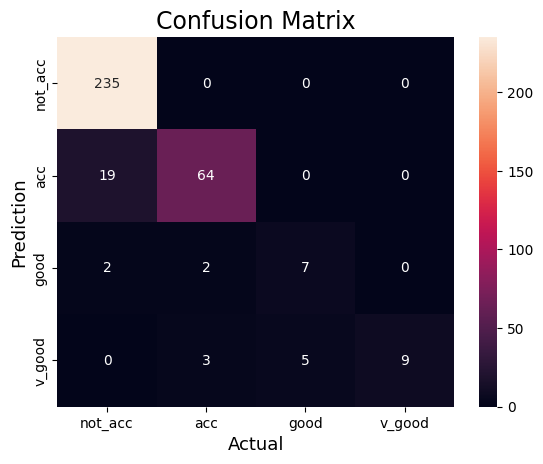

In [274]:
import seaborn as sns
import matplotlib.pyplot as plt


sns.heatmap(cm,
            annot=True,
            fmt='g',
            xticklabels=['not_acc','acc', 'good', 'v_good'],
            yticklabels=['not_acc','acc', 'good', 'v_good'])


plt.ylabel('Prediction',fontsize=13)
plt.xlabel('Actual',fontsize=13)
plt.title('Confusion Matrix',fontsize=17)
plt.show()

# Printing the precision recall and f1 score

In [275]:
from sklearn.metrics import classification_report
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           1       0.92      1.00      0.96       235
           2       0.93      0.77      0.84        83
           3       0.58      0.64      0.61        11
           4       1.00      0.53      0.69        17

    accuracy                           0.91       346
   macro avg       0.86      0.73      0.78       346
weighted avg       0.91      0.91      0.91       346

